# Flu Shot Learning: Predict H1N1 and Seasonal Flu Vaccines

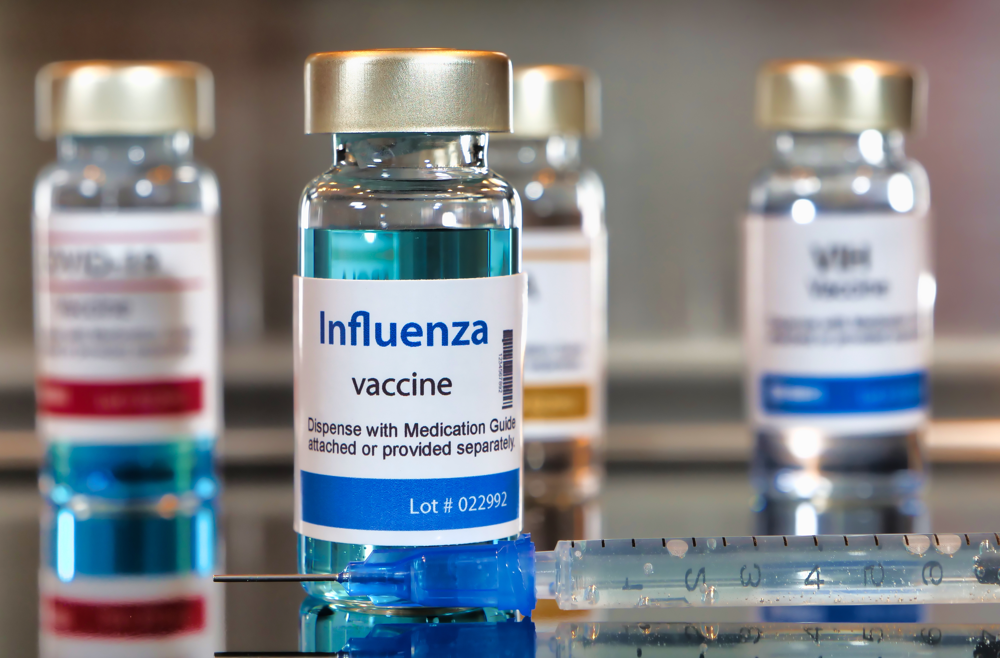

# 1. Introduction and Overview

## Problem description

- Predict how likely individuals are to receive their *H1N1 and seasonal flu vaccines*. 

### Performance Metric

Performance will be evaluated according to the area under the receiver operating characteristic curve (ROC AUC) for each of the two target variables. The mean of these two scores will be the overall score. A higher value indicates stronger performance.

## Problem Statement

Vaccines provide immunization for individuals, and enough immunization in a community can further reduce the spread of diseases through "herd immunity."As of the launch of this competition, vaccines for the COVID-19 virus are still under development and not yet available. The competition will instead revisit the public health response to a different recent major respiratory disease pandemic. Beginning in spring 2009, a pandemic caused by the H1N1 influenza virus, colloquially named "swine flu," swept across the world. Researchers estimate that in the first year, it was responsible for between 151,000 to 575,000 deaths globally.
A vaccine for the H1N1 flu virus became publicly available in October 2009. In late 2009 and early 2010, the United States conducted the National 2009 H1N1 Flu Survey. This phone survey asked respondents whether they had received the H1N1 and seasonal flu vaccines, in conjunction with questions about themselves. These additional questions covered their social, economic, and demographic background, opinions on risks of illness and vaccine effectiveness, and behaviors towards mitigating transmission. A better understanding of how these characteristics are associated with personal vaccination patterns can provide guidance for future public health efforts.

## Data Description

- h1n1_concern - Level of concern about the H1N1 flu.
- h1n1_knowledge - Level of knowledge about H1N1 flu.
- behavioral_antiviral_meds - Has taken antiviral medications. (binary)
- behavioral_avoidance - Has avoided close contact with others with flu-like symptoms. (binary)
- behavioral_face_mask - Has bought a face mask. (binary)
- behavioral_wash_hands - Has frequently washed hands or used hand sanitizer. (binary)
- behavioral_large_gatherings - Has reduced time at large gatherings. (binary)
- behavioral_outside_home - Has reduced contact with people outside of own household. (binary)
- behavioral_touch_face - Has avoided touching eyes, nose, or mouth. (binary)
- doctor_recc_h1n1 - H1N1 flu vaccine was recommended by doctor. (binary)
- doctor_recc_seasonal - Seasonal flu vaccine was recommended by doctor. (binary)
- chronic_med_condition - Has any of the following chronic medical conditions: asthma or an other lung condition, diabetes, a heart condition, a kidney condition, sickle cell anemia or other anemia, a neurological or neuromuscular condition, a liver condition, or a weakened immune system caused by a chronic illness or by medicines taken for a chronic illness. (binary)
- child_under_6_months - Has regular close contact with a child under the age of six months. (binary)
- health_worker - Is a healthcare worker. (binary)
- health_insurance - Has health insurance. (binary)
- opinion_h1n1_vacc_effective - Respondent's opinion about H1N1 vaccine effectiveness.
- opinion_h1n1_risk - Respondent's opinion about risk of getting sick with H1N1 flu without vaccine.
- opinion_h1n1_sick_from_vacc - Respondent's worry of getting sick from taking H1N1 vaccine.
- opinion_seas_vacc_effective - Respondent's opinion about seasonal flu vaccine effectiveness.
- opinion_seas_risk - Respondent's opinion about risk of getting sick with seasonal flu without vaccine.
- opinion_seas_sick_from_vacc - Respondent's worry of getting sick from taking seasonal flu vaccine.
- age_group - Age group of respondent.
- education - Self-reported education level.
- race - Race of respondent.
- sex - Sex of respondent.
- income_poverty - Household annual income of respondent with respect to 2008 Census poverty thresholds.
- marital_status - Marital status of respondent.
- rent_or_own - Housing situation of respondent.
- employment_status - Employment status of respondent.
- hhs_geo_region - Respondent's residence using a 10-region geographic classification defined by the U.S. Dept. of Health and Human Services. Values are represented as short random character strings.
- census_msa - Respondent's residence within metropolitan statistical areas (MSA) as defined by the U.S. Census.
- household_adults - Number of other adults in household, top-coded to 3.
- household_children - Number of children in household, top-coded to 3.
- employment_industry - Type of industry respondent is employed in. Values are represented as short random character strings.
- employment_occupation - Type of occupation of respondent. Values are represented as short random character strings.

## Experimental Design

1. Importing libraries
2. Loading & Reviewing the dataset
3. Exploratory Data Analysis
4. ML Process
5. Modelling
6. Conclusions and Recommendations

### 1. Importing libraries

In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder , OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.multioutput import MultiOutputClassifier
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_multilabel_classification
from sklearn.multioutput import MultiOutputClassifier
from sklearn.multiclass import OneVsRestClassifier


import warnings
warnings.filterwarnings('ignore')

### 2. Loading & Reviewing the dataset

In [2]:
train = pd.read_csv(r"C:\Users\Admin\Documents\PROJECTS\Phase 3 Project\Flu Shot Learning Predict H1N1 and Seasonal Flu Vaccines\Data\training_set_features.csv",index_col=0)

test = pd.read_csv(r"C:\Users\Admin\Documents\PROJECTS\Phase 3 Project\Flu Shot Learning Predict H1N1 and Seasonal Flu Vaccines\Data\test_set_features.csv",index_col=0)

label = pd.read_csv(r"C:\Users\Admin\Documents\PROJECTS\Phase 3 Project\Flu Shot Learning Predict H1N1 and Seasonal Flu Vaccines\Data\training_set_labels.csv",index_col=0)

In [3]:
train.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
respondent_id,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [4]:
label.head()

,h1n1_vaccine,seasonal_vaccine
respondent_id,,
0,0,0
1,0,1
2,0,0
3,0,1
4,0,0


In [5]:
# Descriptive Statistics

train.describe(include='all')

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
count,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,26625.000000,26579.000000,24547.000000,...,22284,25299,24665,25244,26707,26707,26458.000000,26458.000000,13377,13237
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3,2,2,3,10,3,NaN,NaN,21,23
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"<= $75,000, Above Poverty",Married,Own,Employed,lzgpxyit,"MSA, Not Principle City",NaN,NaN,fcxhlnwr,xtkaffoo
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,12777,13555,18736,13560,4297,11645,NaN,NaN,2468,1778
mean,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,0.337315,0.677264,0.220312,...,NaN,NaN,NaN,NaN,NaN,NaN,0.886499,0.534583,NaN,NaN
std,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,0.472802,0.467531,0.414466,...,NaN,NaN,NaN,NaN,NaN,NaN,0.753422,0.928173,NaN,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN
25%,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN
50%,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000,NaN,NaN
75%,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,NaN,NaN


In [6]:
#Checking Frequency of each column in label
print(label["h1n1_vaccine"].value_counts())
print()
print(label["seasonal_vaccine"].value_counts())

0    21033
1     5674
Name: h1n1_vaccine, dtype: int64

0    14272
1    12435
Name: seasonal_vaccine, dtype: int64


Those people who were h1n1 flu vaccinated were **5,674** while those who got  seasonal flu vaccine are **12,435** out of *26,707* respondents who took part in the survey.

In [7]:
#Checking Datatypes
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26707 entries, 0 to 26706
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   h1n1_concern                 26615 non-null  float64
 1   h1n1_knowledge               26591 non-null  float64
 2   behavioral_antiviral_meds    26636 non-null  float64
 3   behavioral_avoidance         26499 non-null  float64
 4   behavioral_face_mask         26688 non-null  float64
 5   behavioral_wash_hands        26665 non-null  float64
 6   behavioral_large_gatherings  26620 non-null  float64
 7   behavioral_outside_home      26625 non-null  float64
 8   behavioral_touch_face        26579 non-null  float64
 9   doctor_recc_h1n1             24547 non-null  float64
 10  doctor_recc_seasonal         24547 non-null  float64
 11  chronic_med_condition        25736 non-null  float64
 12  child_under_6_months         25887 non-null  float64
 13  health_worker   

In [8]:
#Checking the rows and columns in train
train.shape

(26707, 35)

In [9]:
# Joing label and train datasets
df = label.join(train)
df.tail()

,h1n1_vaccine,seasonal_vaccine,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
respondent_id,,,,,,,,,,,,,,,,,,,,,
26702,0,0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,qufhixun,Non-MSA,0.0,0.0,NaN,NaN
26703,0,0,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Rent,Employed,lzgpxyit,"MSA, Principle City",1.0,0.0,fcxhlnwr,cmhcxjea
26704,0,1,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,...,NaN,Not Married,Own,NaN,lzgpxyit,"MSA, Not Principle City",0.0,0.0,NaN,NaN
26705,0,0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Married,Rent,Employed,lrircsnp,Non-MSA,1.0,0.0,fcxhlnwr,haliazsg
26706,0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,mlyzmhmf,"MSA, Principle City",1.0,0.0,NaN,NaN


In [10]:
#Checking for missing values

df.isnull().sum()

h1n1_vaccine                       0
seasonal_vaccine                   0
h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex                                0
i

In [11]:
df.columns

Index(['h1n1_vaccine', 'seasonal_vaccine', 'h1n1_concern', 'h1n1_knowledge',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children', 'employment_industry',
       'employment_occupation'],
      dtype='object')

## 3. Exploratory Data Analysis

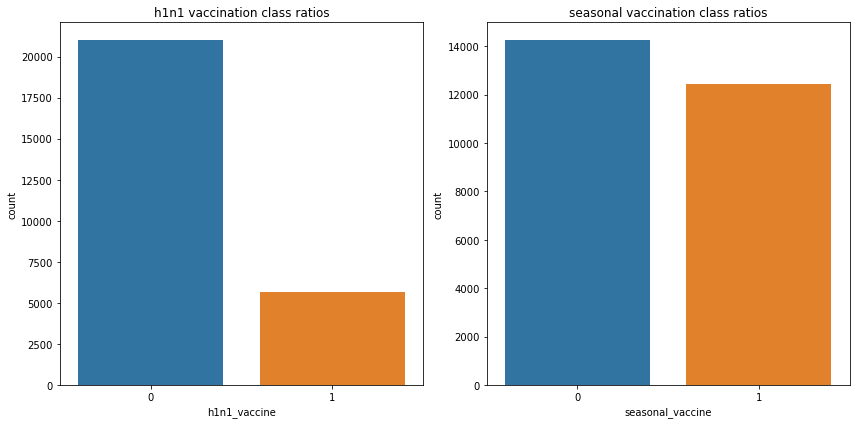

In [12]:
fig, ax = plt.subplots(figsize=(12, 6), ncols=2)
sns.countplot(x='h1n1_vaccine', data=df, ax=ax[0])
sns.countplot(x='seasonal_vaccine', data=df, ax=ax[1])
ax[0].set_title('h1n1 vaccination class ratios')
ax[1].set_title('seasonal vaccination class ratios')
plt.tight_layout()
plt.show();

In terms of class balance, the *seasonal flu* vaccine target has balanced classes, but the *H1N1 flu* vaccine target has moderately imbalanced classes.

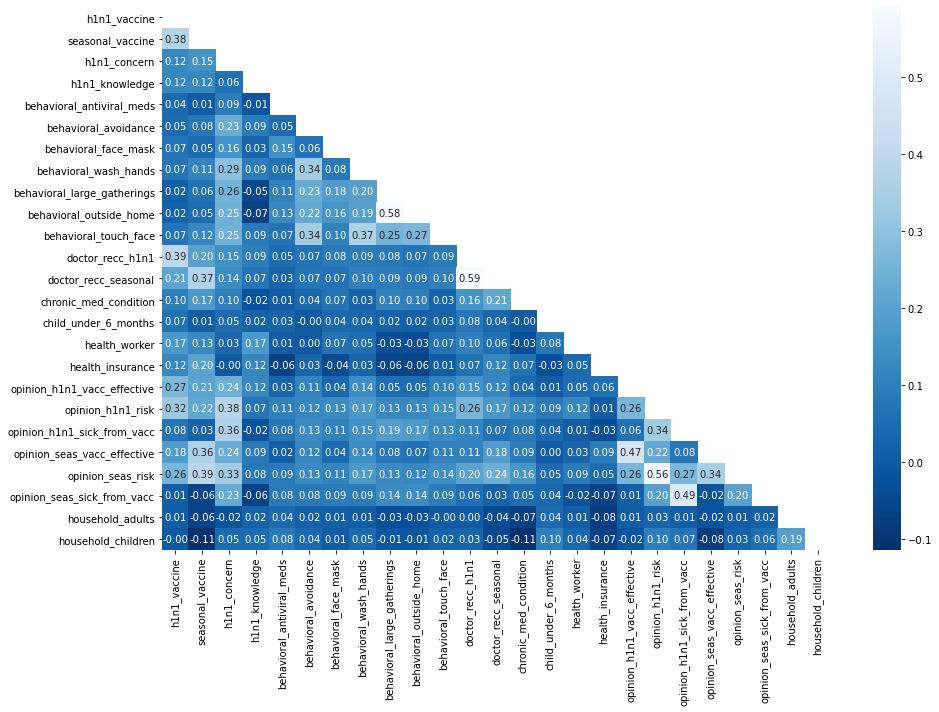

In [13]:
# Checking for correlation

plt.figure(figsize=(15,10))
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
sns.heatmap(df.corr(),annot=True,cmap="Blues_r",fmt=".2f", mask=mask);
plt.show();

In [14]:
#Dropping the columns having most Null values 
df.drop(['health_insurance','employment_industry','employment_occupation'],axis=1,inplace = True)

In [15]:
#eliminate null values

#Numerical type
df=df.fillna(df.mean())

#Categorical types
df=df.fillna('out-of-category')

24
10


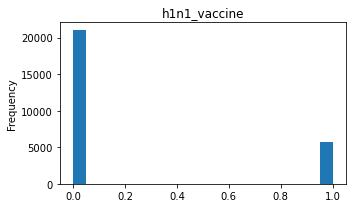

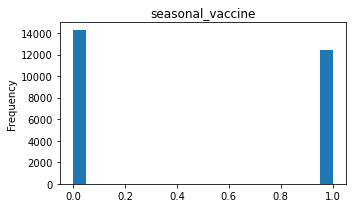

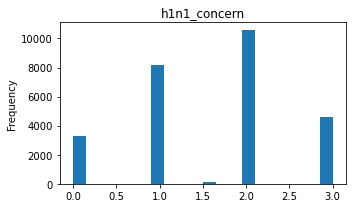

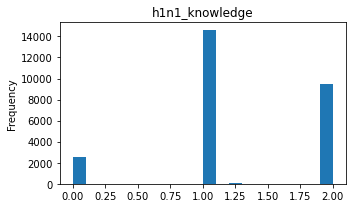

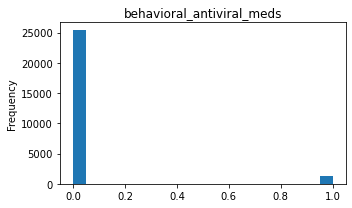

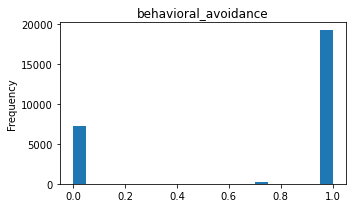

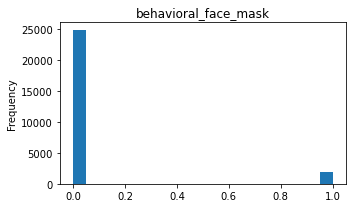

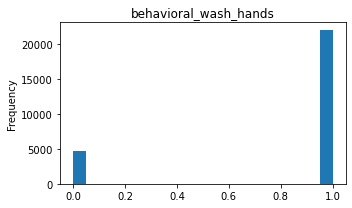

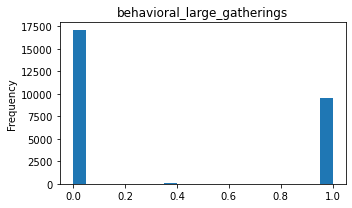

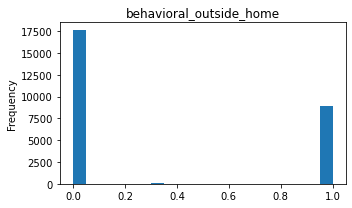

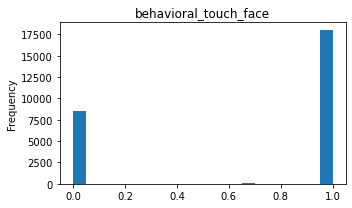

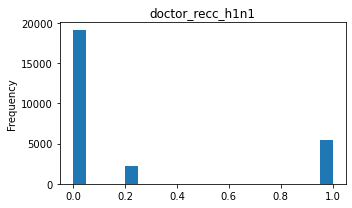

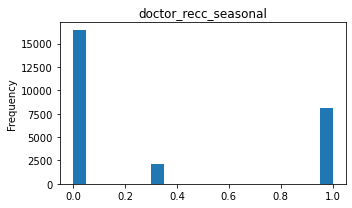

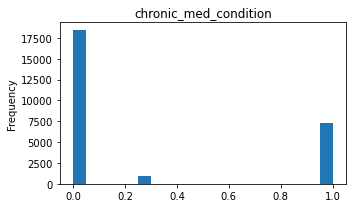

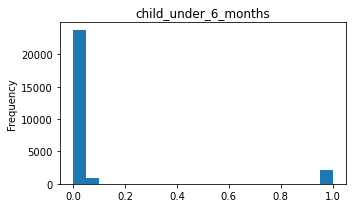

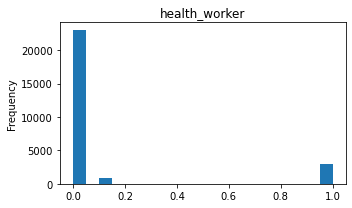

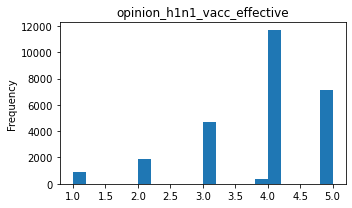

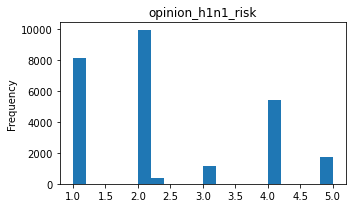

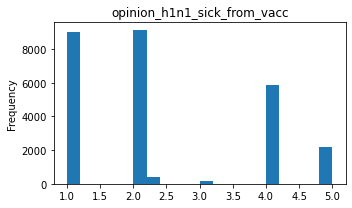

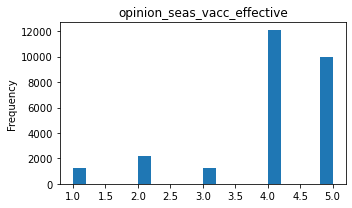

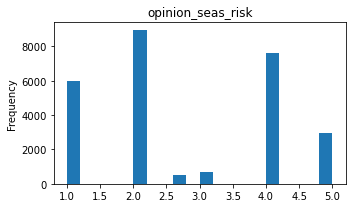

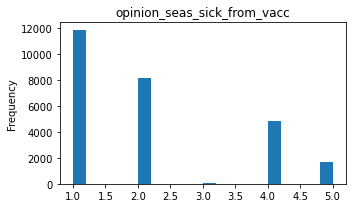

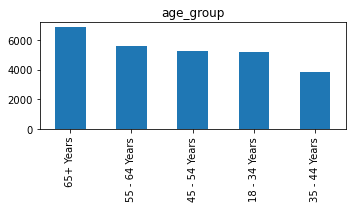

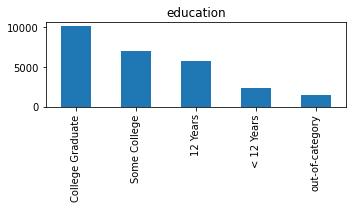

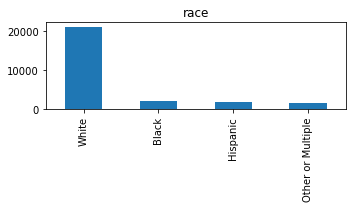

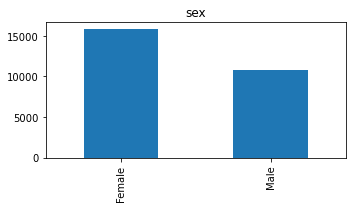

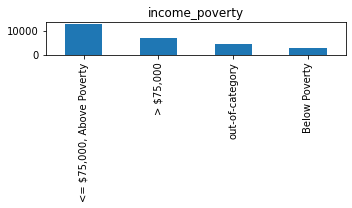

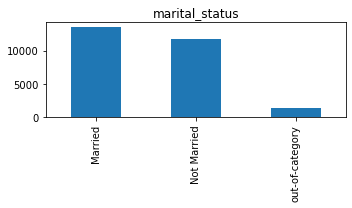

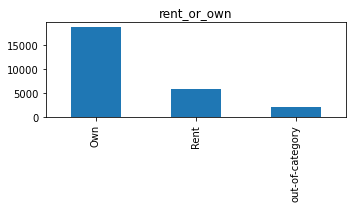

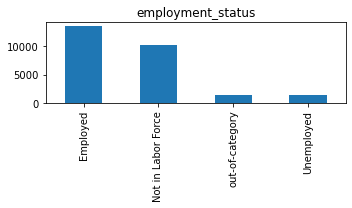

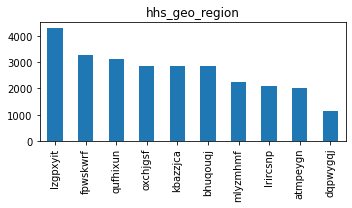

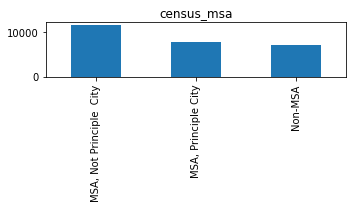

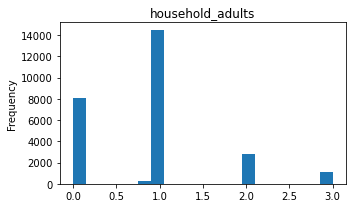

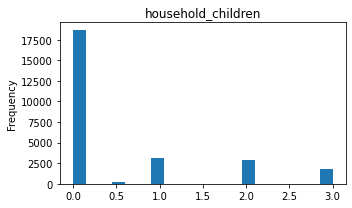

In [16]:
num_list = []
cat_list = []

for column in df:
    if pd.api.types.is_numeric_dtype(df[column]):
        num_list.append(column)
    elif (df[column].dtype, pd.api.types.CategoricalDtype):
        cat_list.append(column)


print(len(num_list))
print(len(cat_list))
        
for column in df:
    plt.figure(figsize=(5,3))
    plt.title(column)
    if pd.api.types.is_numeric_dtype(df[column]):
        df[column].plot(kind='hist', bins=20)
    elif (df[column].dtype, pd.api.types.CategoricalDtype):
        df[column].value_counts()[:10].plot(kind='bar')
    plt.tight_layout();

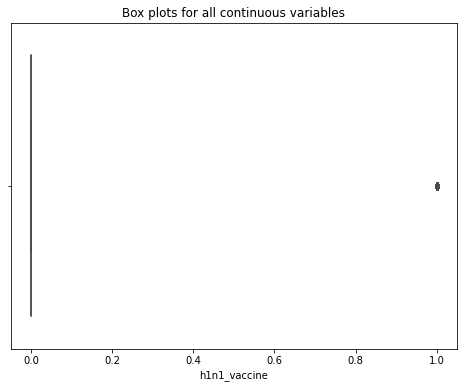

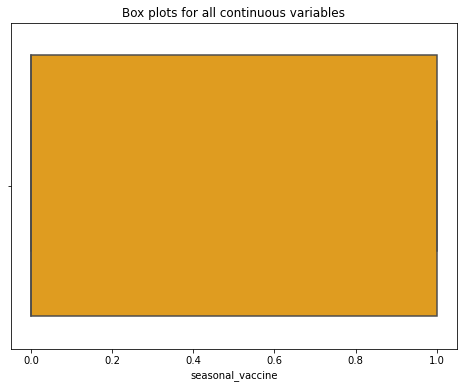

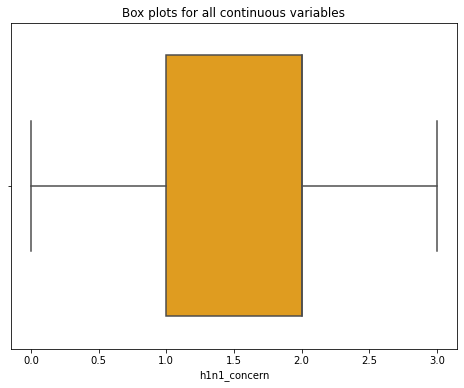

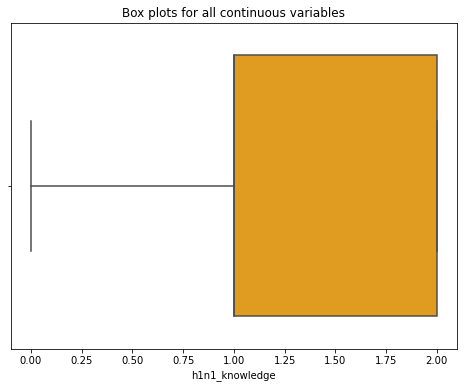

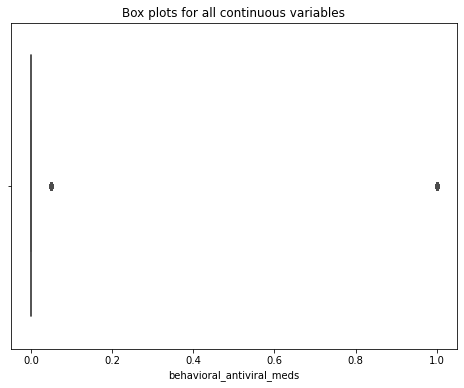

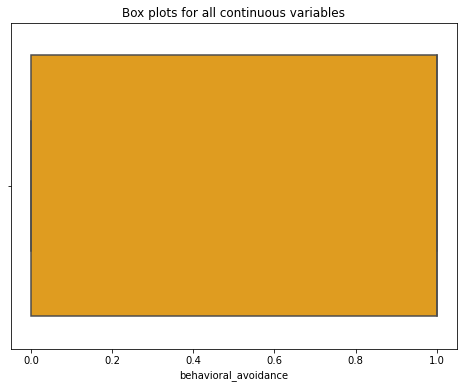

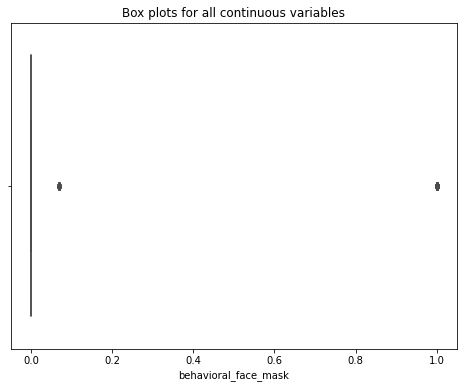

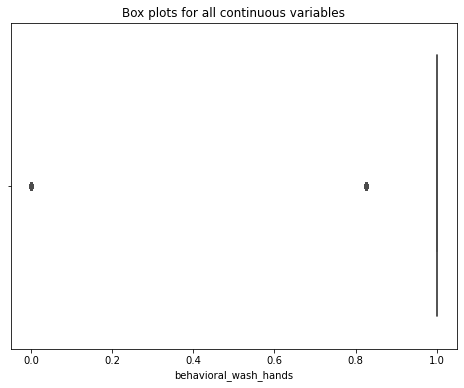

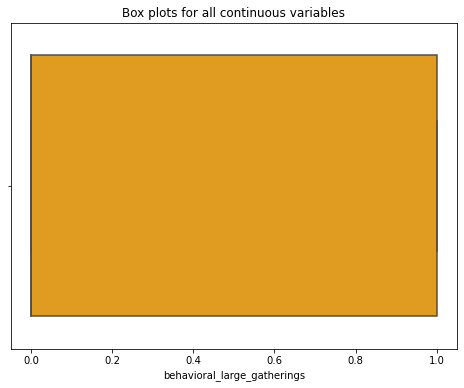

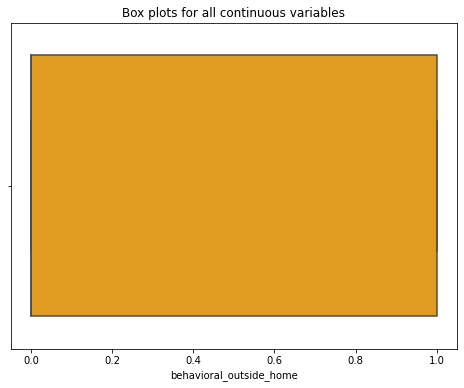

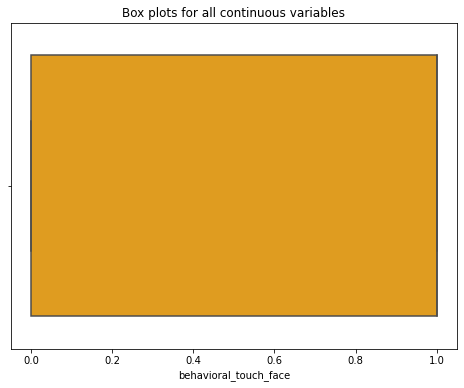

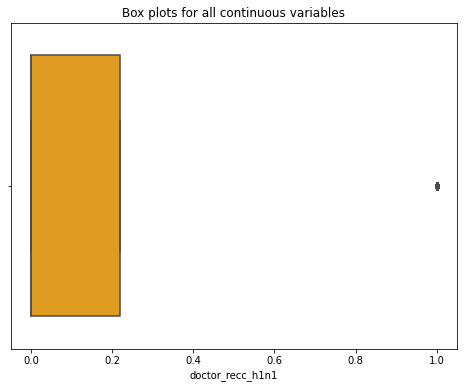

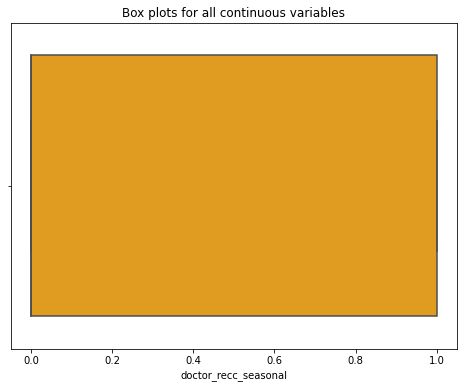

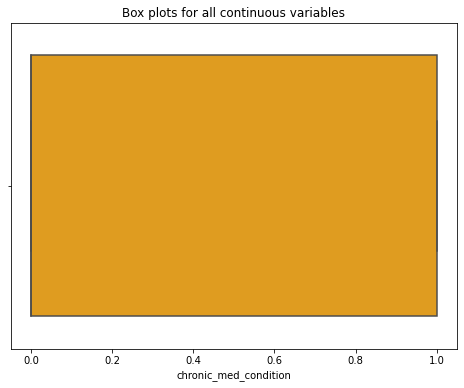

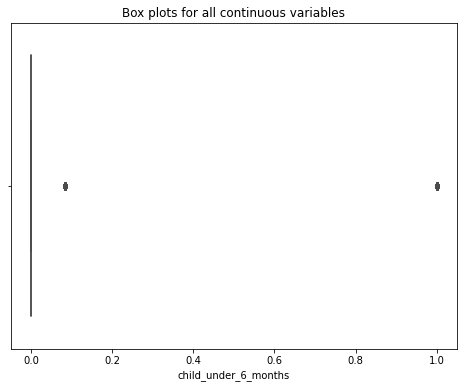

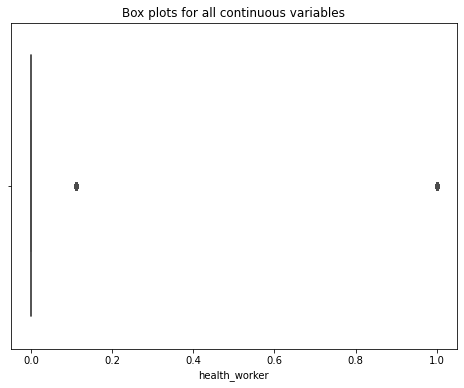

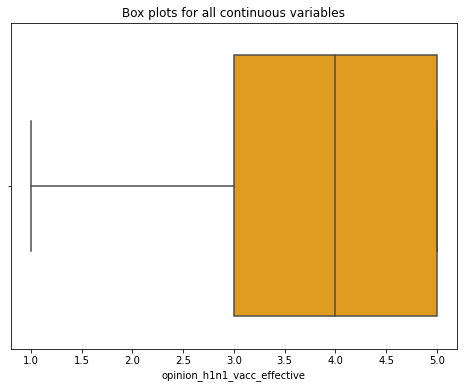

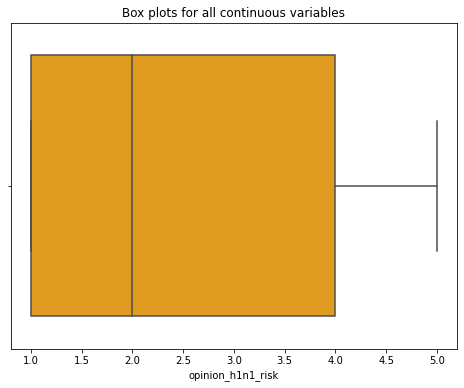

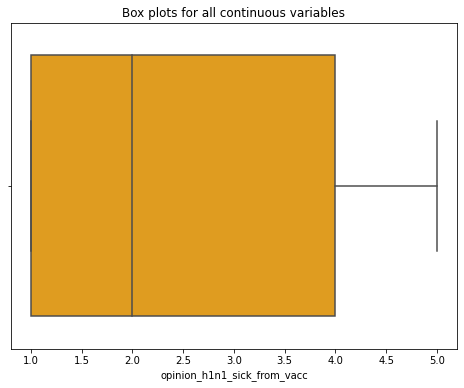

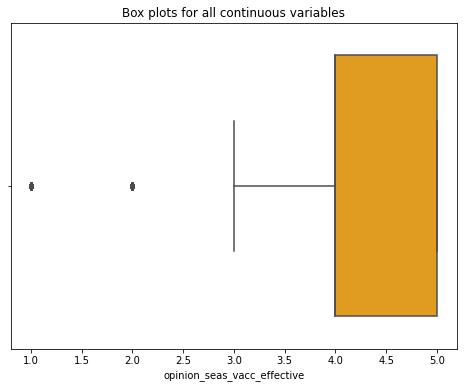

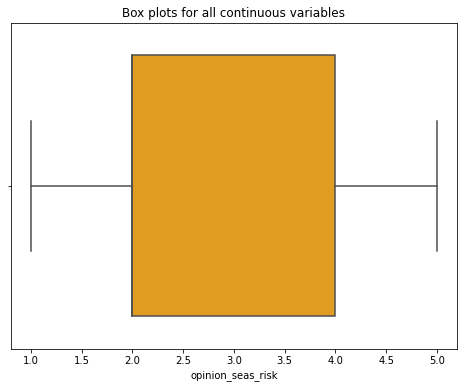

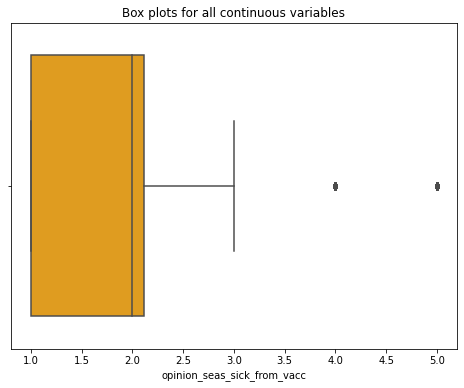

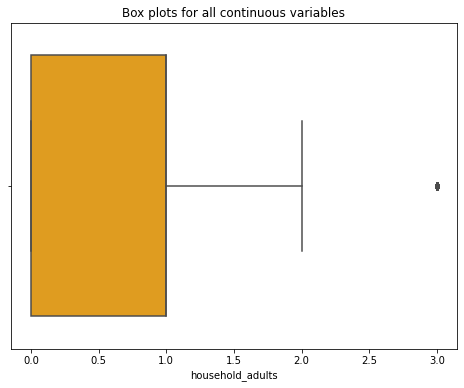

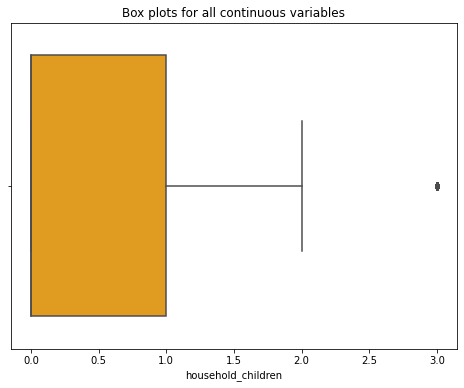

In [23]:
# Checking for outliers in all continuous variables
for col in num_list:
    plt.figure(figsize=(8,6))
    sns.boxplot(x = df[col],color='orange')
    plt.title('Box plots for all continuous variables')
    plt.show();

In [72]:
df.dtypes != "object"

num_cols = df.columns[df.dtypes != "object"].values
print(num_cols)

['h1n1_vaccine' 'seasonal_vaccine' 'h1n1_concern' 'h1n1_knowledge'
 'behavioral_antiviral_meds' 'behavioral_avoidance' 'behavioral_face_mask'
 'behavioral_wash_hands' 'behavioral_large_gatherings'
 'behavioral_outside_home' 'behavioral_touch_face' 'doctor_recc_h1n1'
 'doctor_recc_seasonal' 'chronic_med_condition' 'child_under_6_months'
 'health_worker' 'opinion_h1n1_vacc_effective' 'opinion_h1n1_risk'
 'opinion_h1n1_sick_from_vacc' 'opinion_seas_vacc_effective'
 'opinion_seas_risk' 'opinion_seas_sick_from_vacc' 'household_adults'
 'household_children']


In [ ]:
# # chain preprocessing into a Pipeline object
# # each step is a tuple of (name you chose, sklearn transformer)
# numeric_preprocessing_steps = Pipeline([
#     ('standard_scaler', StandardScaler()),
#     ('simple_imputer', SimpleImputer(strategy='median'))
# ])

# # create the preprocessor stage of final pipeline
# # each entry in the transformer list is a tuple of
# # (name you choose, sklearn transformer, list of columns)
# preprocessor = ColumnTransformer(
#     transformers = [
#         ("numeric", numeric_preprocessing_steps, numeric_cols)
#     ],
#     remainder = "drop"
# )


# estimators = MultiOutputClassifier(
#     estimator=LogisticRegression(penalty="l2", C=1)
# )


# full_pipeline = Pipeline([
#     ("preprocessor", preprocessor),
#     ("estimators", estimators),
# ])

In [93]:
# #Encoding, Standardizing, model using a Pipeline
# pipe = Pipeline([
#     ('standard_scaler', StandardScaler()),
#     ('simple_imputer', SimpleImputer(strategy='median'))
# ])

# p_p = ColumnTransformer(
#     transformers = [
#         ("numeric", pipe, num_cols)
#     ],remainder = "drop")

# estimators = MultiOutputClassifier(
#     estimator=LogisticRegression(penalty="l2", C=1))

# full_p = Pipeline([
#     ("preprocessor", p_p),
#     ("estimators", estimators),])

In [94]:
# full_p

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('standard_scaler',
                                                                   StandardScaler()),
                                                                  ('simple_imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  array(['h1n1_vaccine', 'seasonal_vaccine', 'h1n1_concern',
       'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask',
       'behavioral_wash_hand...
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc',
       'household_adults', 'household_children'], dtype=object))])),
                ('estimators',
                 MultiOutputClassifier(estimator=LogisticRegression(C=1)))])

In [85]:
df_num =df[['h1n1_concern', 'h1n1_knowledge',
 'behavioral_antiviral_meds' ,'behavioral_avoidance', 'behavioral_face_mask',
 'behavioral_wash_hands', 'behavioral_large_gatherings',
 'behavioral_outside_home' ,'behavioral_touch_face' ,'doctor_recc_h1n1',
 'doctor_recc_seasonal', 'chronic_med_condition', 'child_under_6_months',
 'health_worker', 'opinion_h1n1_vacc_effective' ,'opinion_h1n1_risk',
 'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
 'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'household_adults',
 'household_children']].copy()

In [87]:
#Dropping h1n1 and seas columns which are opinionated
new_cols = df_num.drop(['h1n1_concern', 'h1n1_knowledge','doctor_recc_h1n1','opinion_h1n1_vacc_effective','opinion_h1n1_risk',
                 'opinion_h1n1_sick_from_vacc','opinion_seas_vacc_effective',
                 'doctor_recc_seasonal','opinion_seas_risk', 'opinion_seas_sick_from_vacc'], axis=1).copy()

### 4. ML Process

In [98]:
#Assign the Predictors and Target
y = df[['h1n1_vaccine']]
X = new_cols

In [ ]:
# X_train, X_eval, y_train, y_eval = train_test_split(
#     features_df,
#     labels_df,
#     test_size=0.33,
#     shuffle=True,
#     stratify=labels_df,
#     random_state=RANDOM_SEED
# )

In [102]:
# Perform a Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state= 42, shuffle=True,stratify=y)

In [105]:
# Baseline model

logreg = LogisticRegression(solver="liblinear",random_state= 42)
base =logreg.fit(X_train, y_train)
roc_auc_score(y_train, base.decision_function(X_train))

0.6443236571227501

In [118]:
y2 = df[['seasonal_vaccine']]
X = new_cols

# Perform a Train-Test Split
X_train, X_test, y_train2, y_test2 = train_test_split(X, y2, test_size=0.3, random_state= 42, shuffle=True,stratify=y2)

# Baseline model

logreg = LogisticRegression(solver="liblinear",random_state= 42)
base =logreg.fit(X_train, y_train2)
roc_auc_score(y_train2, base.decision_function(X_train))

0.6550981185689365

Seasonal flu vaccine has a higher ROC score than H1N1 flu vaccine of around 1%.

##### SMOTE

In [120]:
# Using SMOTE
sm =  SMOTE(random_state=42, sampling_strategy=0.28)
X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train) 
roc_auc_score(y_train_resampled, base.decision_function(X_train_resampled))
# roc_auc_score(y, y_pred, average=None)

0.4942272177989866

In [ ]:
The SMOTE method makes the model score worse thus it will be avoided.

In [ ]:
#Encoding
ohe_values_train = ohe.fit_transform(X_train_cat).toarray()
ohe_train_df = pd.DataFrame(ohe_values_train, columns=ohe.get_feature_names(X_train_cat.columns))
ohe_train_df.shape

AttributeError: 'tuple' object has no attribute 'fit'